A hardship index is a measure that acts as an indicator of the economic conditions of a community area. The score ranges from 0-100, with a higher score indicating worse economic conditions. For each of the 77 Chicago communities each has a hardship score based on six indicators of socioeconomic status. These six variables are: Percent of housing crowded, Percent of households below poverty, Percent aged 16+ unemployed, Percent aged 25+ without high school diploma, Percent aged under 18 or over 64, and Per capita income. All of the 77 communities also have data that indicates the number of police brutality reports that have been filled withing the community. Therefore, through standardadizing using population, we can create a measure, that we define simply as brutality rate, that measures the number of reports filed under police brutality complaints per 1000 people in each community. We wish to employ machine learning linear regression models to build two predictive models for these two distinct target variables: hardship index and brutality rates. 

Based on the knowledge of the data and the close correlation between socioeconomic indicators and the hardship index, we expect that the socioeconomic data can build a strong predictive model. For the police brutality rates, we cannot tell if brutality rates have any correlation to socioeconomic factors and thus the performance of the linear model will provide more insight.

For this project we will utilize python libraries to prepare our data as well as train and test the model.

To begin, import the libraries that will be required for the task. Pandas is used for data preprocessing while sklearn will be the machine learning library from which we import the linear model to utilize for training and testing.

In [11]:
import pandas as pd
from sklearn import linear_model
import numpy as np

Next, get the socioeconomic data and police brutality counts:

In [3]:
economic_df = pd.read_csv("Socioeconomic_DATA.csv")
police_brutality_df = pd.read_csv("police_brutality.csv")

The to datasets are then merged using the community name as key. Population data is also read in to help normalize the brutality count to brutality rate. All three tables are merged to create the final dataframe to work with.

In [4]:
economic_vs_brutality_df = economic_df.merge(police_brutality_df, left_on='COMMUNITY AREA NAME', right_on='COMMUNITY AREA NAME', how='left')
population_df = pd.read_csv("chicago_population.csv")
df = economic_vs_brutality_df.merge(population_df, left_on='COMMUNITY AREA NAME', right_on='COMMUNITY AREA NAME', how='left')
df['brutality rate'] = (df['sum_police_brutality_count'].astype(float) / df['2010'].astype(float)) * 1000

After doing some final data preprocessing we grab the training data which is broken down to the training data (six attribute), hardship index values and the police brutality rate values.

In [5]:
df = df.drop(['Community Area Number', 'COMMUNITY AREA NAME', '2010', 'sum_police_brutality_count'], axis=1)
cols = [col for col in df.columns if col not in ['brutality rate', 'HARDSHIP INDEX']]
x = df[cols]
y_hardship = df[df.columns[-2]].values
y_brutality = df[df.columns[-1]].values
print(x.shape)
print(y_hardship.shape)
print(y_brutality.shape)


(77, 6)
(77,)
(77,)


To get a better understanding of the correlation in our attributes and target values, we can generate some sample plots to see how our the target values are related to the attributes.

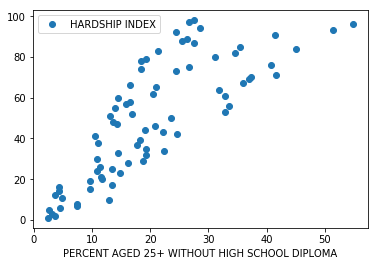

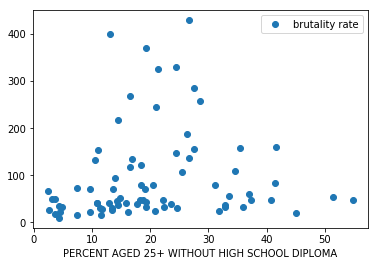

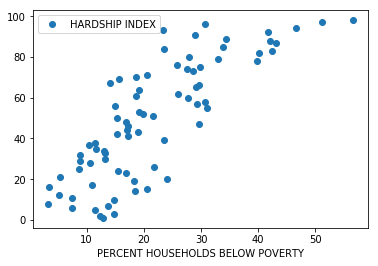

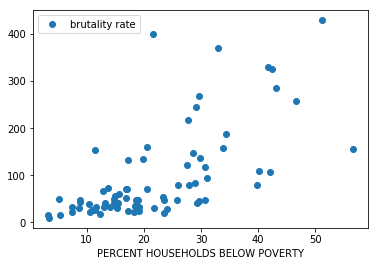

In [8]:
df.plot(x='PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA', y='HARDSHIP INDEX', style='o');
df.plot(x='PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA', y='brutality rate', style='o');
df.plot(x='PERCENT HOUSEHOLDS BELOW POVERTY', y='HARDSHIP INDEX', style='o');
df.plot(x='PERCENT HOUSEHOLDS BELOW POVERTY', y='brutality rate', style='o');

Through data preprocessing, we can already see that our data appears to have linear correlation to the hardship index and not to the brutality rates. 


Below, we split the data into the training and testing parts. We use 67 rows for training and 10 rows for testing.

In [9]:
x_train = x[:-10]
x_test = x[-10:]
y_brutality_train = y_brutality[:-10]
y_brutality_test = y_brutality[-10:]
y_hardship_train = y_hardship[:-10]
y_hardship_test = y_hardship[-10:]

We train, score and predict one sample with each of our two predictive linear models.

In [12]:
brutality_regr = linear_model.LinearRegression()
brutality_regr.fit(x_train, y_brutality_train)
# print(brutality_regr.coef_)

hardship_regr = linear_model.LinearRegression()
hardship_regr.fit(x_train, y_hardship_train)
# print(hardship_regr.coef_)

np.mean((brutality_regr.predict(x_test) - y_brutality_test)**2)
print("The model score for the brutality rates is: ", brutality_regr.score(x_test, y_brutality_test)) # value closer to 1 indicates a good prediction model


np.mean((hardship_regr.predict(x_test) - y_hardship_test)**2)
print("The model score for the hardship index: ", hardship_regr.score(x_test, y_hardship_test)) # value closer to 1 indicates a good prediction model

The model score for the brutality rates is:  0.7187677004508944
The model score for the hardship index:  0.982399140519935


As shown above, the predictive model for the hardship index based on socioeconomic status of community areas performs very well achieving an accuracy of about 98% on the test data. The predictive model for police brutality rates on the other hand performs poorly scoring an accuracy of only 91%. 

A few insights can help understand why a linear regression model performs great for one of the target outputs but not the other. The hardship index, as defined above, is a measure that is closely correlated with the hardship index. Thus it would make sense that with the correct tuning of the weights, which for our 6 variables, our models ends up with the coefficients we produced, a linear model can predict the output variable y (hardship index), provided with the right attributes. Police brutality on the other hand, should hopefully have no correlation to the socioeconomic status of community areas since they should operate fairly across the board. Thus it makes sense that a predictive model built on socioeconomic data attributes cannot predict the police brutality rates since the two have no close correlation.